# Bank Marketing
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit (see variable `y`). 

Not sure where to begin? Scroll to the bottom to find challenges!

In [13]:
library(dplyr)
library(tidyverse)
library(caret)

mktg_data <- read.csv2("bank-marketing.csv")
View(mktg_data)
summary(mktg_data) 

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


      age            job              marital           education        
 Min.   :17.00   Length:41188       Length:41188       Length:41188      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :38.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.02                                                           
 3rd Qu.:47.00                                                           
 Max.   :98.00                                                           
   default            housing              loan             contact         
 Length:41188       Length:41188       Length:41188       Length:41188      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [14]:
#Data Manipulation!

sapply(mktg_data, class)
table(is.na(mktg_data))

char_cols <- sapply(mktg_data, is.character)

mktg_data[char_cols] <- lapply(mktg_data[char_cols], as.factor)

sapply(mktg_data, class)

age            job        marital      education        default 
     "integer"    "character"    "character"    "character"    "character" 
       housing           loan        contact          month    day_of_week 
   "character"    "character"    "character"    "character"    "character" 
      duration       campaign          pdays       previous       poutcome 
     "integer"      "integer"      "integer"      "integer"    "character" 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
   "character"    "character"    "character"    "character"    "character" 
             y 
   "character"


 FALSE 
864948 

age            job        marital      education        default 
     "integer"       "factor"       "factor"       "factor"       "factor" 
       housing           loan        contact          month    day_of_week 
      "factor"       "factor"       "factor"       "factor"       "factor" 
      duration       campaign          pdays       previous       poutcome 
     "integer"      "integer"      "integer"      "integer"       "factor" 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
      "factor"       "factor"       "factor"       "factor"       "factor" 
             y 
      "factor"

  sum(y = 1)/n()
1   2.427892e-05
# A tibble: 12 × 4
   job            subs total sub_rate
   <fct>         <int> <int>    <dbl>
 1 admin.         1352 10422   0.130 
 2 blue-collar     638  9254   0.0689
 3 entrepreneur    124  1456   0.0852
 4 housemaid       106  1060   0.1   
 5 management      328  2924   0.112 
 6 retired         434  1720   0.252 
 7 self-employed   149  1421   0.105 
 8 services        323  3969   0.0814
 9 student         275   875   0.314 
10 technician      730  6743   0.108 
11 unemployed      144  1014   0.142 
12 unknown          37   330   0.112 


y,mean_age,mean_contact
<fct>,<dbl>,<dbl>
no,39.91119,0.1323739
yes,40.91315,0.4926724


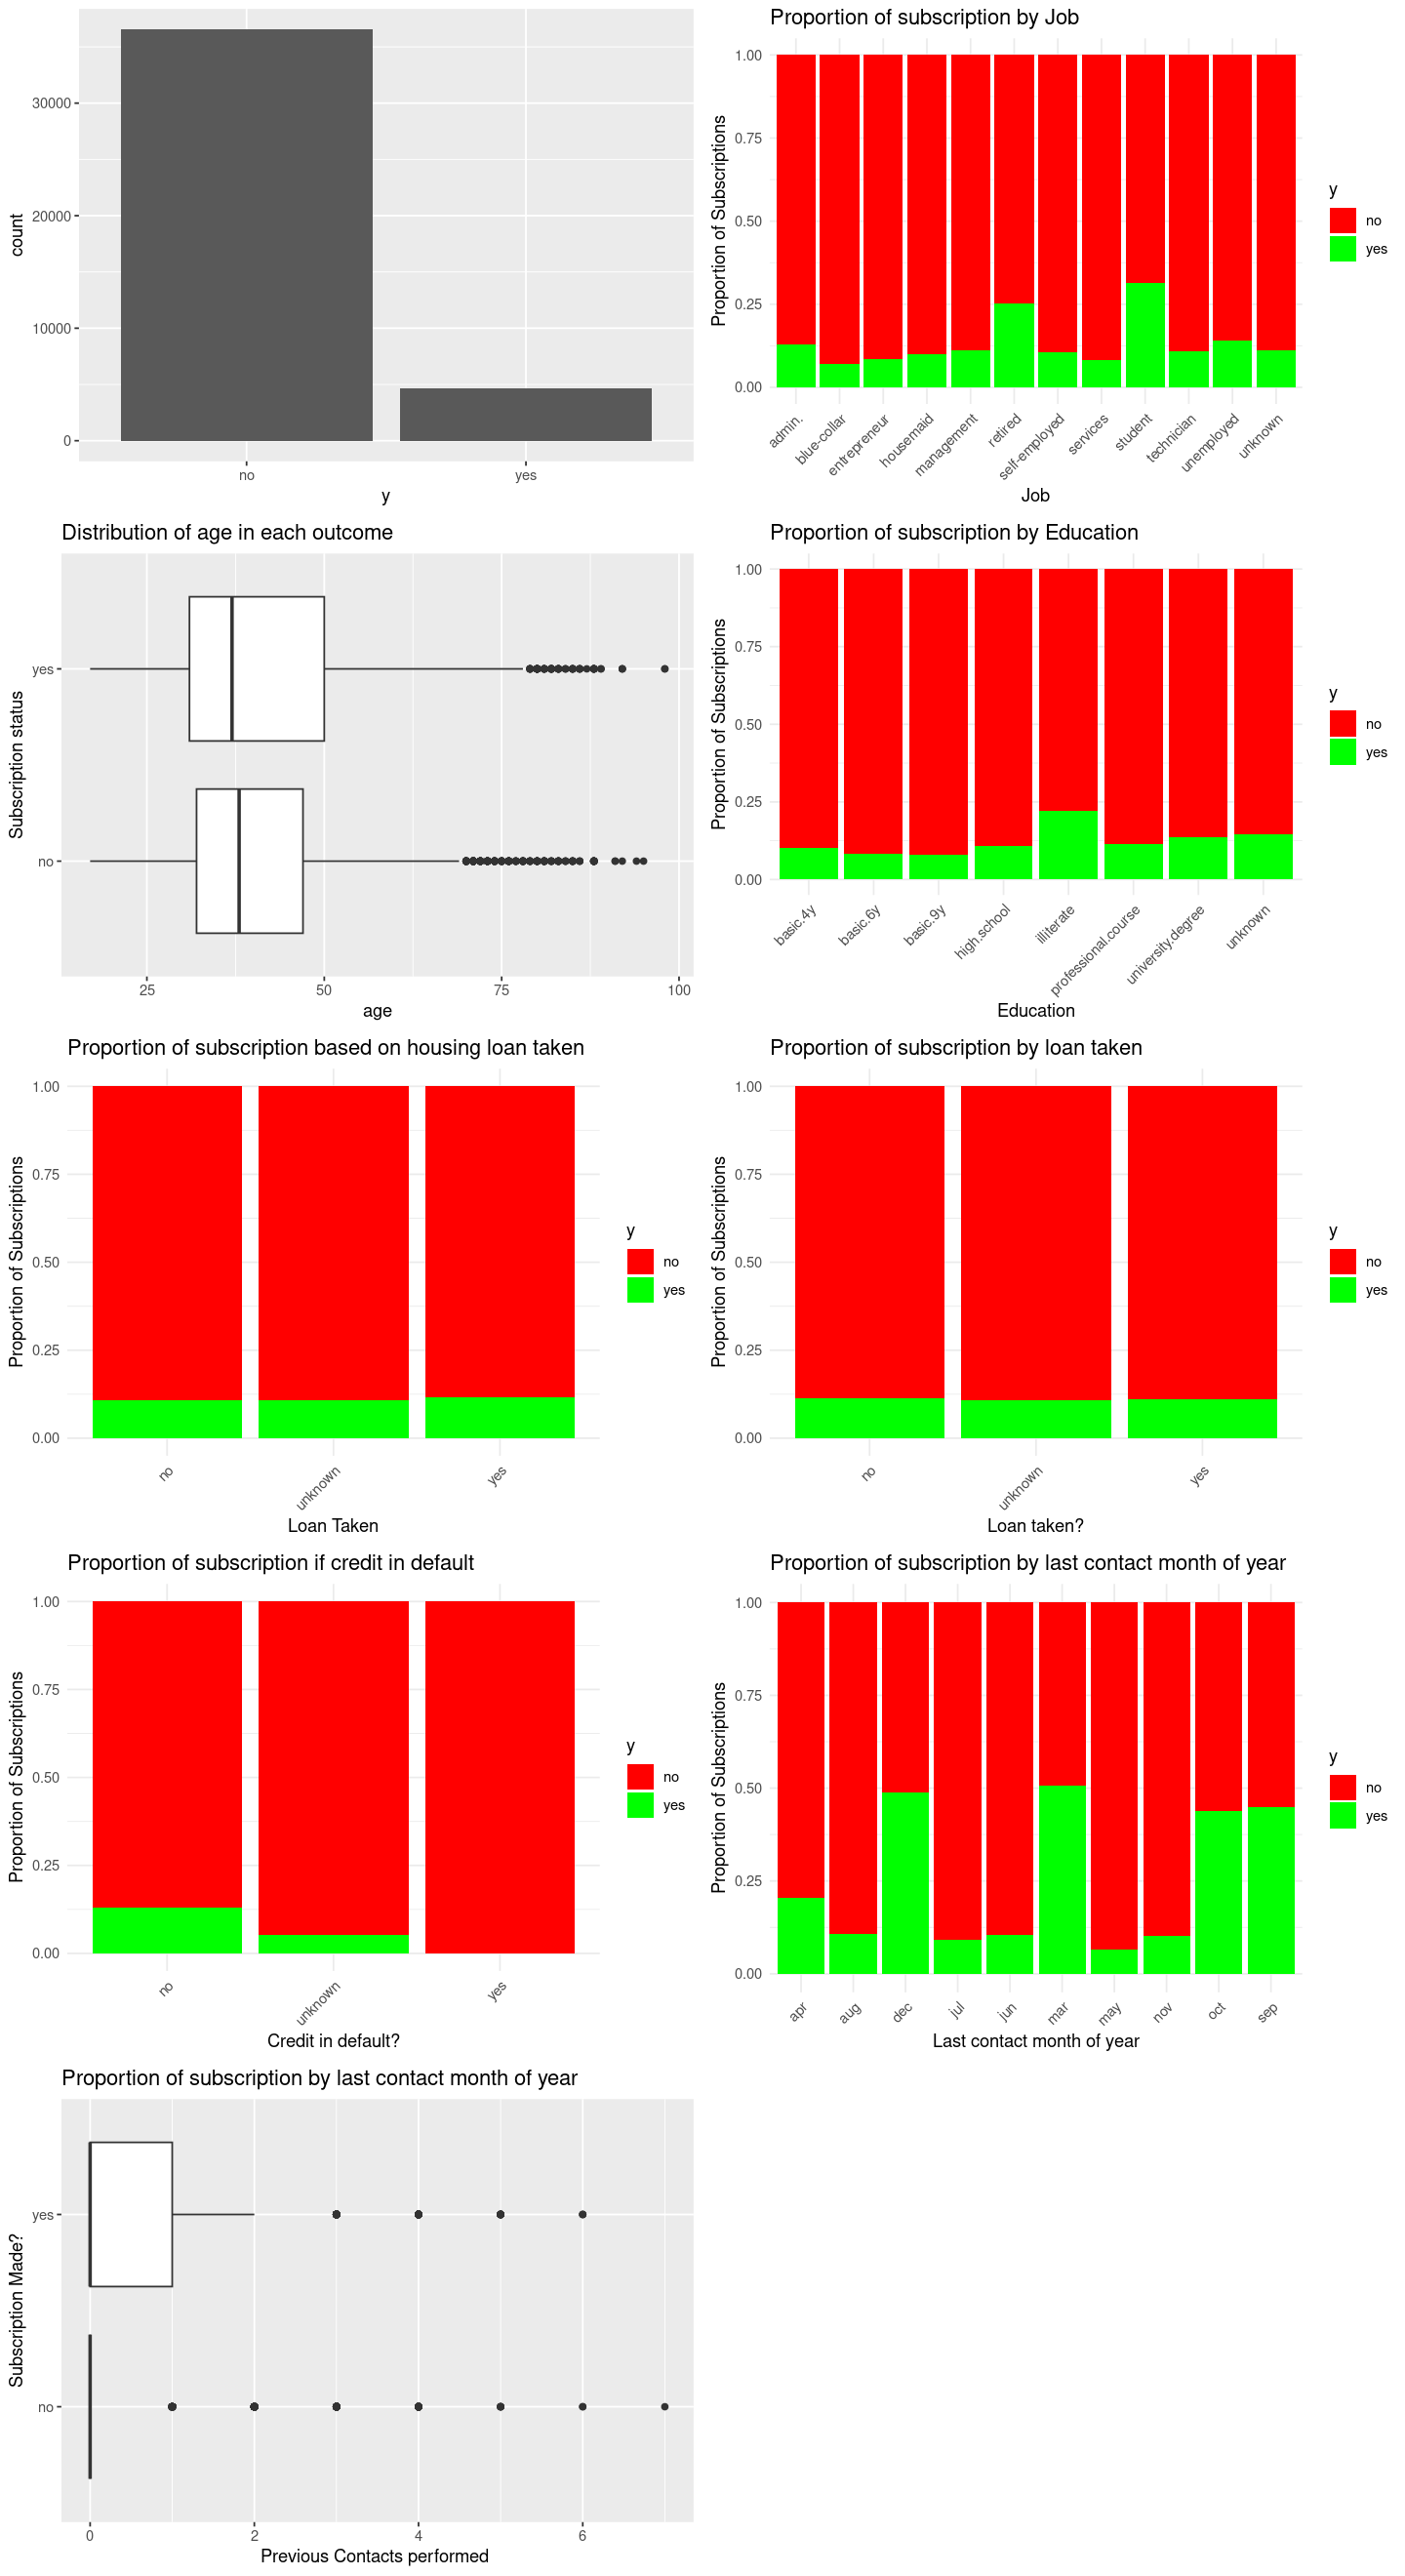

In [16]:
#Data Exploration and Vizualizations
#Exploring how Jobs relate to the likelihood of subscription.

library(gridExtra)

#calculating subscription rate by job
overall_sub_rate <- mktg_data %>% 
				summarize(sum(y=1)/n())
print(overall_sub_rate)
subscription_rate <- mktg_data %>%
				group_by(job) %>%
				summarize(subs = sum(y== "yes"), total = n()) %>% mutate(sub_rate = subs/total)
print(subscription_rate)

# Creating a stacked proportion plot
library(ggplot2)

sub_plot <- ggplot(mktg_data, aes(x = y)) + geom_bar()

job_plot <- ggplot(mktg_data, aes(x = job, fill = y)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of subscription by Job",
       x = "Job",
       y = "Proportion of Subscriptions") +
  scale_fill_manual(values = c("red", "green")) +
  theme_minimal()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

age_plot <- ggplot(mktg_data, aes(age, y)) + geom_boxplot() + labs(title = "Distribution of age in each outcome", y = "Subscription status")

education_plot <- ggplot(mktg_data, aes(x = education, fill = y)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of subscription by Education",
       x = "Education",
       y = "Proportion of Subscriptions") +
  scale_fill_manual(values = c("Red", "Green")) +
  theme_minimal()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

housing_plot <- ggplot(mktg_data, aes(x = housing, fill = y)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of subscription based on housing loan taken",
       x = "Loan Taken",
       y = "Proportion of Subscriptions") +
  scale_fill_manual(values = c("red", "green")) +
  theme_minimal()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

loan_plot <- ggplot(mktg_data, aes(x = loan, fill = y)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of subscription by loan taken",
       x = "Loan taken?",
       y = "Proportion of Subscriptions") +
  scale_fill_manual(values = c("Red", "green")) +
  theme_minimal()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

default_plot <- ggplot(mktg_data, aes(x = default, fill = y)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of subscription if credit in default",
       x = "Credit in default?",
       y = "Proportion of Subscriptions") +
  scale_fill_manual(values = c("Red", "Green")) +
  theme_minimal()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

month_plot <- ggplot(mktg_data, aes(x = month, fill = y)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of subscription by last contact month of year",
       x = "Last contact month of year",
       y = "Proportion of Subscriptions") +
  scale_fill_manual(values = c("Red", "Green")) +
  theme_minimal()  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

previous_plot <- ggplot(mktg_data, aes(previous, y)) +
  geom_boxplot() +
  labs(title = "Proportion of subscription by last contact month of year",
       x = "Previous Contacts performed ",
       y = "Subscription Made?") 
options(repr.plot.width = 12, repr.plot.height = 22)
grid.arrange(sub_plot,job_plot, age_plot, education_plot, housing_plot, loan_plot, default_plot, month_plot, previous_plot, nrow = 5)

mktg_data %>%
    group_by(y) %>%
	summarize(mean_age = mean(age, na.rm = TRUE), mean_contact = mean(previous, na.rm = TRUE))
			  

In [12]:
# Set a seed for reproducibility
set.seed(123)

# Split the data into training and testing sets using a 70-30 split
train_index <- createDataPartition(mktg_data$y, p = 0.7, list = FALSE)
train_data <- mktg_data[train_index,]
test_data <- mktg_data[-train_index,]

# Training a logistic regression model with selected variables
# Note: The model is trained on `train_data` instead of `mktg_data`
log_reg <- glm(y ~ previous + job + age + education + housing + loan + default, data = train_data, family = binomial)
summary(log_reg)

# Check levels of selected factor variables in training data
training_levels <- lapply(train_data[, c("job", "education", "month", "loan", "housing", "default", "previous")], levels)

# Check levels of selected factor variables in test data
test_levels <- lapply(test_data[, c("job", "education", "month", "loan", "housing", "default", "previous")], levels)

# Compare levels between training and test data to ensure consistency
for (i in seq_along(training_levels)) {
  print(paste("Variable:", names(training_levels)[i]))
  print(paste("Training Levels:", training_levels[[i]]))
  print(paste("Test Levels:", test_levels[[i]]))
}

# Note: Adjust levels if needed to ensure that both training and test data have the same levels for factor variables

# Evaluate the model by making predictions on the test set
# Note: Use type = "response" to get probabilities for the positive class
predictions <- predict(log_reg, test_data, type = "response")

# Convert probabilities to binary outcome based on a threshold (e.g., 0.5)
predicted_class <- ifelse(predictions > 0.5, "yes", "no")

# Load the caret package to use confusionMatrix function
library(caret)

# Create a confusion matrix to evaluate model performance
# Note: Ensure that both predicted_class and test_data$y are factors with the same levels
confusionMatrix(as.factor(predicted_class), as.factor(test_data$y))

# Additional steps for tuning hyperparameters and making predictions on new data are commented out
# These can be uncommented and used as needed


Call:
glm(formula = y ~ previous + job + age + education + housing + 
    loan + default, family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4550  -0.4878  -0.4201  -0.3249   2.6940  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -2.459667   0.132967 -18.498  < 2e-16 ***
previous                       0.839012   0.029569  28.374  < 2e-16 ***
jobblue-collar                -0.406215   0.076876  -5.284 1.26e-07 ***
jobentrepreneur               -0.371466   0.121106  -3.067 0.002160 ** 
jobhousemaid                  -0.209134   0.138949  -1.505 0.132296    
jobmanagement                 -0.191879   0.081281  -2.361 0.018241 *  
jobretired                     0.702631   0.097569   7.201 5.96e-13 ***
jobself-employed              -0.164142   0.113468  -1.447 0.148010    
jobservices                   -0.358270   0.084637  -

[1] "Variable: job"
 [1] "Training Levels: admin."        "Training Levels: blue-collar"  
 [3] "Training Levels: entrepreneur"  "Training Levels: housemaid"    
 [5] "Training Levels: management"    "Training Levels: retired"      
 [7] "Training Levels: self-employed" "Training Levels: services"     
 [9] "Training Levels: student"       "Training Levels: technician"   
[11] "Training Levels: unemployed"    "Training Levels: unknown"      
 [1] "Test Levels: admin."        "Test Levels: blue-collar"  
 [3] "Test Levels: entrepreneur"  "Test Levels: housemaid"    
 [5] "Test Levels: management"    "Test Levels: retired"      
 [7] "Test Levels: self-employed" "Test Levels: services"     
 [9] "Test Levels: student"       "Test Levels: technician"   
[11] "Test Levels: unemployed"    "Test Levels: unknown"      
[1] "Variable: education"
[1] "Training Levels: basic.4y"           
[2] "Training Levels: basic.6y"           
[3] "Training Levels: basic.9y"           
[4] "Training Levels:

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  10911  1321
       yes    53    71
                                          
               Accuracy : 0.8888          
                 95% CI : (0.8831, 0.8943)
    No Information Rate : 0.8873          
    P-Value [Acc > NIR] : 0.3102          
                                          
                  Kappa : 0.0767          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99517         
            Specificity : 0.05101         
         Pos Pred Value : 0.89200         
         Neg Pred Value : 0.57258         
             Prevalence : 0.88734         
         Detection Rate : 0.88305         
   Detection Prevalence : 0.98996         
      Balanced Accuracy : 0.52309         
                                          
       'Positive' Class : no              
                  

The logistic regression model reveals several significant coefficients that influence the likelihood of subscriptions. For instance, the positive coefficient for "previous" suggests that previous contacts with customers positively affect the likelihood of subscriptions, indicating that customers previously contacted are more likely to subscribe. Similarly, certain job categories like "retired" and "student" show positive coefficients, suggesting that individuals in these occupations are more likely to subscribe. Conversely, variables like "defaultunknown" and "defaultyes" exhibit negative coefficients, indicating that customers with unknown or existing default credit status are less likely to subscribe. These significant predictors contribute to the model's ability to differentiate between subscribers and non-subscribers, as evidenced by the relatively high accuracy of around 88.88%. However, it's crucial to interpret these coefficients in the context of the business domain and consider additional factors not captured in the model that may also influence subscription behavior. Further model refinement and validation may help enhance predictive accuracy and robustness for practical application. I will continue to refine the model!

## Data Dictionary
| Column | Variable | Class |
| --- | --------------- | --- |
| age | age of customer | |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | marital status | categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed |
| education | highest degree of customer | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | has credit in default? | categorical: "no","yes","unknown" |
| housing | has housing loan? | categorical: "no","yes","unknown" |
| loan | has personal loan? | categorical: "no","yes","unknown" |
| contact | contact communication type | categorical: "cellular","telephone" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| day_of_week | last contact day of the week | categorical: "mon","tue","wed","thu","fri" |
| campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | numeric |
| poutcome | outcome of the previous marketing campaign | categorical: "failure","nonexistent","success" |
| emp.var.rate | employment variation rate - quarterly indicator | numeric |
| cons.price.idx | consumer price index - monthly indicator | numeric   | 
| cons.conf.idx | consumer confidence index - monthly indicator | numeric |   
| euribor3m | euribor 3 month rate - daily indicator | numeric |
| nr.employed | number of employees - quarterly indicator | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

[Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing) of dataset. 

**Citations**:  
- S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. 

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What are the jobs of the people most likely to subscribe to a term deposit?
- 📊 **Visualize**: Create a plot to visualize the number of people subscribing to a term deposit by `month`.
- 🔎 **Analyze**: What impact does the number of contacts performed during the last campaign have on the likelihood that a customer subscribes to a term deposit?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You work for a financial services firm. The past few campaigns have not gone as well as the firm would have hoped, and they are looking for ways to optimize their marketing efforts.

They have supplied you with data from a previous campaign and some additional metrics such as the consumer price index and consumer confidence index. They want to know whether you can predict the likelihood of subscribing to a term deposit. The manager would also like to know what factors are most likely to increase a customer's probability of subscribing.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.